# 1. Extract or Read data

In [25]:
import os
os.listdir(path="Dataset_Files")

['.gitkeep',
 '50_Startups.csv',
 'Churn_Modelling.csv',
 'Employee_attrition.csv',
 'Housing.csv',
 'Mall_Customers.csv',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Passenger_test.csv',
 'Passenger_train.csv',
 'Pearson.txt',
 'Position_Salaries.csv',
 'Result_Datasets',
 'Salary_Data.csv',
 'Social_Network_Ads.csv',
 'Stud_part1.csv',
 'Stud_part2.csv',
 'winequality-red.csv',
 'winequality-white.csv']

In [26]:
import pandas as pd
data=pd.read_csv('Dataset_Files\\Housing.csv').iloc[:,1:]
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2. Feature Extraction

In [27]:
def f(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    data.loc[data[i]<lb,i]=lb
    data.loc[data[i]>ub,i]=ub

for i in data.columns:
    f(i)

<Axes: >

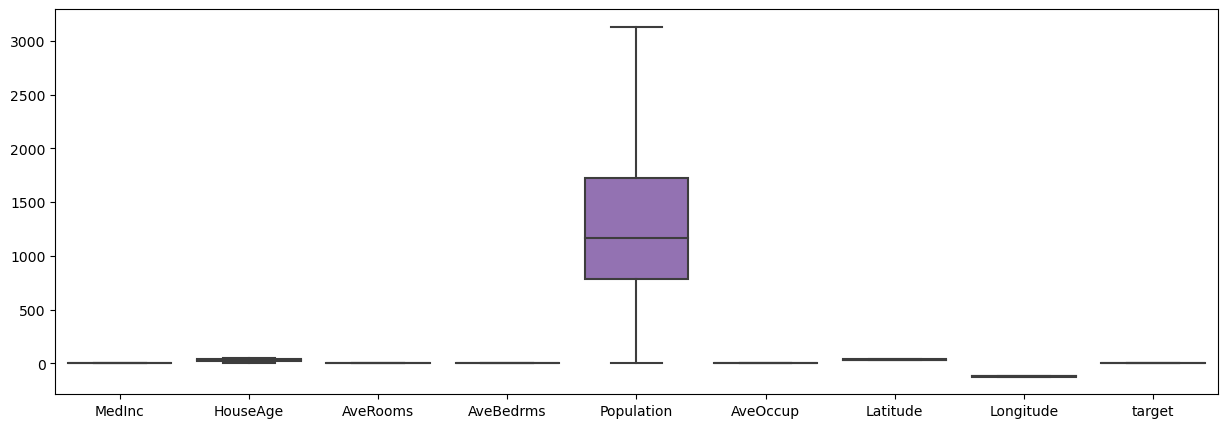

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.boxplot(data)

In [29]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.556800,18.0,6.114035,1.239697,356.0,3.122807,39.49,-121.21,0.771
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.867200,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [30]:
x=data.iloc[:,1:3]  #[["HouseAge",	"AveRooms"]]
y=data.iloc[:,-1]

# 3. Model Building

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

# 4. Model Prediction

In [34]:
y_pred=knr.predict(x_test)
y_pred

array([1.3325   , 2.0415   , 1.432    , ..., 1.584    , 2.9055625,
       2.0345   ])

# 5. Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9302201756298449
1.4696937108917998
1.2123092472186294


# 6.Result Visualization

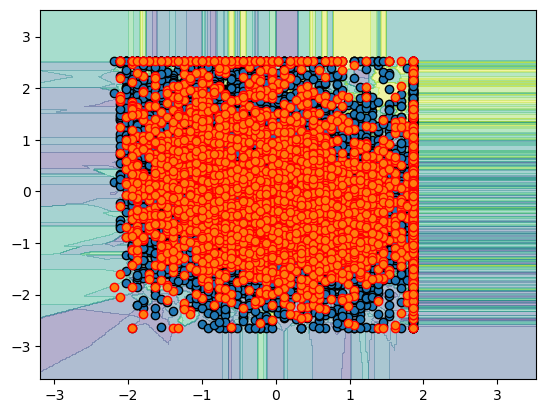

In [36]:
import matplotlib.pyplot as plt

x_min,x_max=x_train[:,0].min()-1 , x_train[:,1].max()+1
y_min,y_max=x_train[:,1].min()-1 , x_train[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
z=knr.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.4)
plt.scatter(x_train[:,0],x_train[:,1],edgecolors="black")
plt.scatter(x_test[:,0],x_test[:,1],edgecolors="red")
plt.show()